## 80 collision hotspot locations: OSMnx speed data

This notebook outputs OSMnx speed stats for the 80 collision hotspots we've identified in LA. Huge thanks to Yoh for all of his help with this notebook.

*Notebook Author:* Ellie

In [60]:
import pandas as pd

In [61]:
#import csv to dataframe
df = pd.read_csv('Data/locations.csv')

In [62]:
df

,point_x,point_y,match_addr
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA"
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA"
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA"
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA"
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA"
...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA"
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA"
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA"
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA"


In [63]:
# add columns to df for metrics to capture later on
df['5 mph']=0
df['15 mph']=0
df['25 mph']=0
df['30 mph']=0
df['35 mph']=0
df['45 mph']=0

In [64]:
df

,point_x,point_y,match_addr,5 mph,15 mph,25 mph,30 mph,35 mph,45 mph
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",0,0,0,0,0,0
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,0,0,0,0,0
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",0,0,0,0,0,0
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",0,0,0,0,0,0
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",0,0,0,0,0,0
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",0,0,0,0,0,0
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",0,0,0,0,0,0
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,0,0,0,0,0


In [65]:
# rename columns
df.columns = ['Longitude',
              'Latitude',
              'Location',
              '5 mph',
              '15 mph',
              '25 mph',
              '30 mph',
              '35 mph',
              '45 mph']
df

,Longitude,Latitude,Location,5 mph,15 mph,25 mph,30 mph,35 mph,45 mph
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",0,0,0,0,0,0
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,0,0,0,0,0
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",0,0,0,0,0,0
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",0,0,0,0,0,0
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",0,0,0,0,0,0
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",0,0,0,0,0,0
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",0,0,0,0,0,0
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,0,0,0,0,0


In [66]:
import geopandas as gpd
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

,Longitude,Latitude,Location,5 mph,15 mph,25 mph,30 mph,35 mph,45 mph,geometry
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.27032 34.06666)
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.26521 33.92548)
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.33348 34.07616)
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.25608 34.01604)
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.25652 33.95390)
...,...,...,...,...,...,...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.30902 33.96726)
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.30902 33.96621)
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.36251 34.06303)
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.57142 34.17699)


## Creating a function that will loop through our 80 locations

In [67]:
# for plotting
import matplotlib.pyplot as plt

# for spatial
import geopandas as gpd

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

In [68]:
# create a function 
def analyze_speed(lat,lon):
    # call osmnx with a lat/lon pair
    G = ox.graph.graph_from_point((lat,lon),dist=1000)
    
    #project to webmercator 
    G = ox.project_graph(G, to_crs='epsg:3857')
    
    # convert nodes and edges to geodataframes
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
    
    # value counts for edges 'maxspeed'
    maxspeed = gdf_edges['maxspeed'].value_counts()
   
    # return observations as a dictionary
    d = dict()
    d['5 mph']=len(gdf_edges[gdf_edges['maxspeed'] == '5 mph'])
    d['15 mph']=len(gdf_edges[gdf_edges['maxspeed'] == '15 mph'])
    d['25 mph']=len(gdf_edges[gdf_edges['maxspeed'] == '25 mph'])
    d['30 mph']=len(gdf_edges[gdf_edges['maxspeed'] == '30 mph'])
    d['35 mph']=len(gdf_edges[gdf_edges['maxspeed'] == '35 mph'])
    d['45 mph']=len(gdf_edges[gdf_edges['maxspeed'] == '45 mph'])
    return d
analyze_speed(34.066662, -118.270324)

{'5 mph': 0, '15 mph': 0, '25 mph': 6, '30 mph': 0, '35 mph': 138, '45 mph': 0}

In [69]:
# testing the function with another random lat/lon pair
analyze_speed(34.076157, -118.33348)

{'5 mph': 0, '15 mph': 0, '25 mph': 6, '30 mph': 0, '35 mph': 134, '45 mph': 0}

In [70]:
# loop through the dataframe and analyze
for index, row in gdf.iterrows():
    # call the function
    new_data = analyze_speed(row.Latitude,row.Longitude)
    
    # add data to the column you created
    gdf.loc[index, '5 mph'] = new_data['5 mph']
    gdf.loc[index, '15 mph'] = new_data['15 mph']
    gdf.loc[index, '25 mph'] = new_data['25 mph']
    gdf.loc[index, '30 mph'] = new_data['30 mph']
    gdf.loc[index, '35 mph'] = new_data['35 mph']
    gdf.loc[index, '45 mph'] = new_data['45 mph']

KeyError: 'maxspeed'

In [71]:
# see new data added to gdf columns
# even though I got an error above it looks like the data has been added to the gdf
gdf

,Longitude,Latitude,Location,5 mph,15 mph,25 mph,30 mph,35 mph,45 mph,geometry
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",0,0,6,0,138,0,POINT (-118.27032 34.06666)
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,0,0,0,16,0,POINT (-118.26521 33.92548)
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",0,0,6,0,134,0,POINT (-118.33348 34.07616)
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",2,0,0,0,30,0,POINT (-118.25608 34.01604)
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",0,0,0,0,72,0,POINT (-118.25652 33.95390)
...,...,...,...,...,...,...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.30902 33.96726)
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.30902 33.96621)
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.36251 34.06303)
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,0,0,0,0,0,POINT (-118.57142 34.17699)


## Plotting a bar chart with speed stats

In [72]:
# column totals
gdf.sum(numeric_only=True)

Longitude   -9706.003811
Latitude     2794.715834
5 mph           2.000000
15 mph          0.000000
25 mph         12.000000
30 mph         84.000000
35 mph        533.000000
45 mph          0.000000
dtype: float64

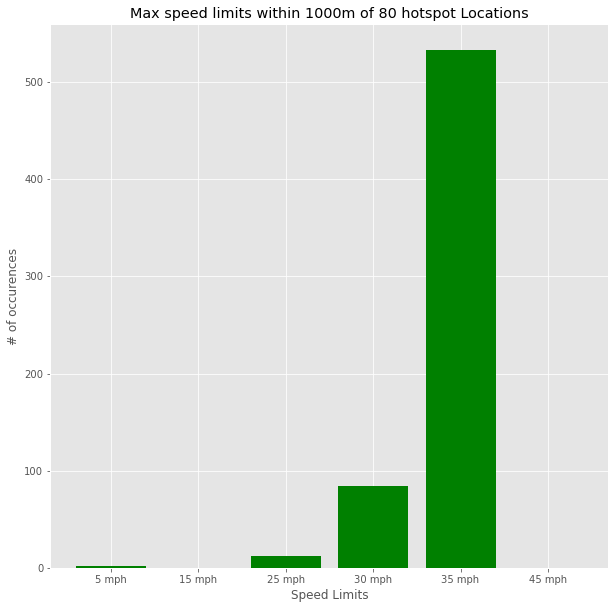

In [83]:
# plotting the bar chart with the totals from above

%matplotlib inline
plt.style.use('ggplot')
x = ['5 mph', '15 mph', '25 mph', '30 mph', '35 mph', '45 mph']
speeds = [2, 0, 12, 84, 533, 0]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10, 10))
plt.bar(x_pos, speeds, color='green')
plt.xlabel("Speed Limits")
plt.ylabel("# of occurences")
plt.title("Max speed limits within 1000m of 80 hotspot Locations")

plt.xticks(x_pos, x)

plt.show()